[nltk_data] Downloading package stopwords to /home/ayala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ayala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ayala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.7264150943396226


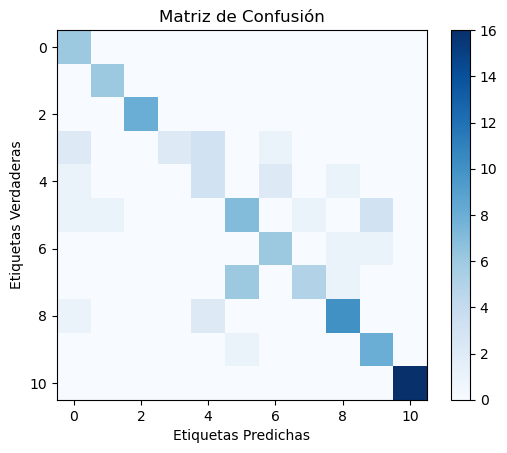

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


df_balanceado = pd.read_csv('../../dataset/megaGymDataset_balanceado.csv')
def clean_text(text):
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

def preprocess_data(X):
    """
    Preprocess input data.

    Parameters:
    X (pd.Series): Input data.

    Returns:
    pd.Series: Preprocessed data.
    """
    return X.apply(clean_text)

X = df_balanceado['Desc']
y = df_balanceado['BodyPart']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos
X_train_preprocessed = preprocess_data(X_train)
X_test_preprocessed = preprocess_data(X_test)

# Vectorización de texto
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_preprocessed)
X_test_tfidf = tfidf_vectorizer.transform(X_test_preprocessed)

# Entrenamiento del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

def predict_muscle(description, vectorizer, model):
    
    # Preprocess the description
    description_preprocessed = preprocess_data(pd.Series([description]))

    # Vectorize the preprocessed description
    description_vectorized = vectorizer.transform(description_preprocessed)

    # Predict the muscle
    predicted_muscle = model.predict(description_vectorized)
    
    return predicted_muscle[0]

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [2]:
description = "Lateral raises are an isolation exercise that primarily targets the medial head of the shoulder (lateral head or lateral shoulder) and is typically performed with dumbbells, although it can also be performed with a pulley, kettlebell, or resistance bands.."
predicted_body_part = predict_muscle(description, tfidf_vectorizer, model)
print("Predicted Body Part:", predicted_body_part)


Predicted Body Part: Shoulders
